In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [3]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.memory_growth(gpu, True)

In [4]:
ds = tfds.load('fashion_mnist',split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\ASUS\tensorflow_datasets\fashion_mnist\3.0.1.incompleteYZYCLV\fashion_mnist-train.tfrecord*…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\ASUS\tensorflow_datasets\fashion_mnist\3.0.1.incompleteYZYCLV\fashion_mnist-test.tfrecord*.…

Dataset fashion_mnist downloaded and prepared to C:\Users\ASUS\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


In [5]:
ds.as_numpy_iterator().next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

In [6]:
# Making a data iterator aka connection
data_iterator = ds.as_numpy_iterator()

In [7]:
#getting data 
data_iterator.next()['image'].shape


(28, 28, 1)

In [8]:
data_iterator.next()['image'].shape

(28, 28, 1)

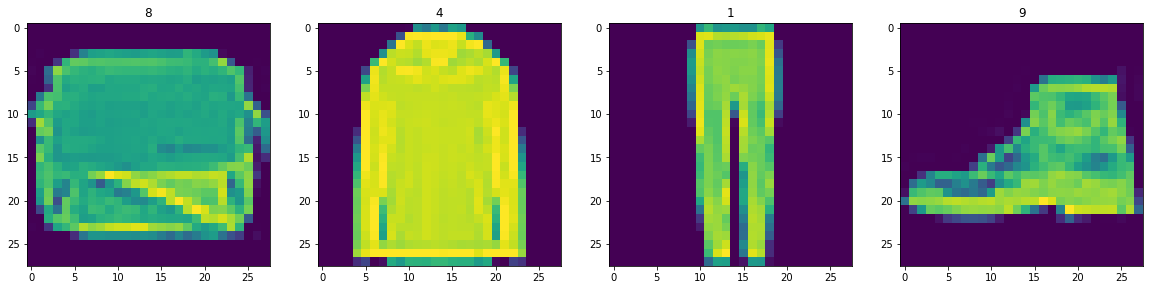

In [9]:
Fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
	sample = data_iterator.next()
	ax[idx]. imshow(np.squeeze(sample['image']))
	ax[idx].title.set_text(sample['label'])

In [10]:
def scale_img(data):
    image = data['image']
    image = image / 255 # Scale the pixel values between 0 and 1
    return image


Map
cache
shuffle
batch
prefetch

In [11]:
ds = ds.map(scale_img)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D


# Generator

In [19]:
def build_generator():
	model = Sequential()
    
	model.add(Dense(7*7*128, input_dim=128))
	model.add(LeakyReLU(0.2))
	model.add(Reshape((7,7,128)))

	model.add(UpSampling2D())
	model.add(Conv2D(128, 5, padding='same'))
	model.add(LeakyReLU(0.2))
    
	model.add(UpSampling2D())
	model.add(Conv2D(128, 5, padding='same'))
	model.add(LeakyReLU(0.2))
        
	model.add(Conv2D(128, 4, padding='same'))
	model.add(LeakyReLU(0.2))
    
	model.add(Conv2D(128, 4, padding='same'))
	model.add(LeakyReLU(0.2))
    
	model.add(Conv2D(128, 4, padding='same'))
	model.add(LeakyReLU(0.2))
    
	model.add(Conv2D(128, 4, padding='same'))
	model.add(LeakyReLU(0.2))

	model.add(Conv2D(1, 4, padding='same', activation='tanh'))
    
	return model
    





In [20]:
test_model = build_generator()

In [21]:
test_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_3 (UpSampling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                      

In [32]:
fashion = test_model.predict(np.random.randn(4,128,1))

1/1 [==============================] - 0s 48ms/step


In [33]:
fashion.shape

(4, 28, 28, 1)

In [ ]:
Fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, fashion in enumerate(fashion):
	ax[idx].imshow(np.squeeze(fashion))
	ax[idx].title.set_text(idx)

# Discriminator 

In [27]:
def build_discriminator():
    model = Sequential()
    model.add(Conv2D(32, 5, input_shape=(28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1,activation='sigmoid'))
    
    return model

In [28]:
test_dis = build_discriminator()

In [30]:
test_dis.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 128)      

In [34]:
fashion = test_model.predict(np.random.randn(4,128,1))

1/1 [==============================] - 0s 55ms/step


In [36]:
fashion[1].shape

(28, 28, 1)

In [38]:
test_dis.predict(np.expand_dims(fashion[1],0))

1/1 [==============================] - 0s 25ms/step


array([[0.5000283]], dtype=float32)

# Training

In [43]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [44]:
gan_opt = Adam(learning_rate=0.0001)
dis_opt = Adam(learning_rate=0.00001)
gan_loss = BinaryCrossentropy()
dis_loss = BinaryCrossentropy()

In [45]:
from tensorflow.keras.models import Model

In [50]:
class fashionGAN(Model):
    def __init__(self,generator, discriminator, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.generator = generator
        self.discriminator = discriminator
        
        
    def train_step(self,batch):
        real_images = batch
        fake_images = self.generator(tf.random.normal((128,128,1)),training=False)
        
        with tf.GradientTape() as d_tape:
            #passing real images 
            yhat_real = self.discriminator(real_images, training=True)
            #passing fake images
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            #Label
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)],axis=0)
            #Add noise to true outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = 0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake],axis=0)
            #Calculating loss
            total_dis_loss = self.dis_loss(y_realfake, yhat_realfake)
        #apply backpropagation - nn learn
        dgrad = d_tape.gradient(total_dis_loss, self.discriminator.trainable_variables)
        self.dis_opt.apply_gradients(zip(dgrad,self.discriminator.trainable_variables))
        with tf.GradientTape() as g_tape :
            
        #Generate
        	gen_img = self.generator(tf.random.normal((128,128,1)))
        #create labels
        	predicted_labels = self.discriminator(gen_img,training=False)
        #calculate loss
        	total_gan_loss = self.gan_loss(tf.zeros_like(predicted_labels),predicted_labels)
        ggrad = g_tape.gradient(total_gan_loss, self.generator.trainable_variables)
        self.gan_opt.apply_gradients(zip(ggrad,self.generator.trainable_variables))
        
        return {"discriminator loss": total_dis_loss,"generator loss ": total_gan_loss}
        
    def compile(self, gan_opt, dis_opt, gan_loss, dis_loss, *args, **kwargs):
        super().compile(*args,**kwargs)
        self.gan_opt = gan_opt
        self.gan_loss = gan_loss
        self.dis_opt = dis_opt
        self.dis_loss = dis_loss
        
    
        

In [51]:
fashgan = fashionGAN(test_model,test_dis)

In [52]:
fashgan.compile(gan_opt, dis_opt, gan_loss, dis_loss)

In [54]:
import os 
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [55]:
class ModelMonitor(Callback):
	def init (self, num_img=3, latent_dim=128):
		self.num_img = num_img
		self.latent_dim=latent_dim

	def on_epoch_end(self, epoch, logs=None):
		random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
		generated_images = self.model.generator(random_latent_vectors)
		generated_images *= 255
		generated_images.numpy()
		for i in range(self.num_img):
			img = array_to_img(generated_images[i])
			img.save(os.path.join('images', f'generated_img {epoch} {i}.png'))

 


# Training process 
***recommended 2000 epochs***

In [ ]:
hist = fashgan.fit(ds, epochs=20, callbacks=[ModelMonitor()])

Epoch 1/20
 61/469 [==>...........................] - ETA: 1:14:12 - discriminator loss: 0.6772 - generator loss : 0.7510